# Import Data


In [452]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install xlrd
%pip install scikit-learn
%pip install seaborn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is a

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns  # สร้างกราฟ Boxplot
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error

%matplotlib inline


In [454]:
# Define the directory to search for CSV and XLS files
directory = Path(r'./dataset/')
# Find all CSV and XLS files in the directory and its subdirectories
csv = list(directory.rglob('*.csv'))
xls = list(directory.rglob('*.xls'))

files = csv + xls


In [455]:
# import urllib.parse
# dataset_repo = "https://github.com/kittizz/water_quality_data_collection/raw/main/"
csv_files = list()
xls_files = list()
for index in range(len(files)):
    file = files[index]

    if "63" in file.name or "62" in file.name:
        # if file.name.endswith(".csv"):
        #     csv_files.append(dataset_repo+urllib.parse.quote(str(file)))
        # if file.name.endswith(".xls"):
        #     xls_files.append(dataset_repo+urllib.parse.quote(str(file)))

        if file.name.endswith(".csv"):
            csv_files.append(str(file))
        if file.name.endswith(".xls"):
            xls_files.append(str(file))


In [456]:
df1 = pd.concat([pd.read_csv(f, encoding='utf-8')
                 for f in csv_files])
df2 = pd.concat([pd.read_excel(f)
                 for f in xls_files])

df_concat = pd.concat([df1, df2], axis=0)

# Preprocessing - Data Cleaning


In [457]:
df_concat.shape

(2387596, 12)

In [458]:
df_concat

,สถานี,วันที่-เวลา,pH,DO,EC,Temp,หมายเลข,Salinity,Turbidity,BOD,COD,TotalNH3
0,กระทุ่มแบน จ.สมุทรสาคร (117),1 ม.ค.2562 00:00,5.400,0.500,695.400,26.300,NaN,NaN,NaN,NaN,NaN,NaN
1,กระทุ่มแบน จ.สมุทรสาคร (117),1 ม.ค.2562 00:30,5.500,0.500,692.200,26.300,NaN,NaN,NaN,NaN,NaN,NaN
2,กระทุ่มแบน จ.สมุทรสาคร (117),1 ม.ค.2562 01:00,5.500,0.400,693.500,26.300,NaN,NaN,NaN,NaN,NaN,NaN
3,กระทุ่มแบน จ.สมุทรสาคร (117),1 ม.ค.2562 01:30,5.500,0.400,692.600,26.300,NaN,NaN,NaN,NaN,NaN,NaN
4,กระทุ่มแบน จ.สมุทรสาคร (117),1 ม.ค.2562 02:00,5.500,0.400,694.700,26.200,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8754,NaN,31 ธ.ค.2558 21:30,8.8,5.4,22788.4,-200.5,222.0,1.64,,NaN,NaN,NaN
8755,NaN,31 ธ.ค.2558 22:00,8.8,5.3,22792.0,-200.5,222.0,1.64,,NaN,NaN,NaN
8756,NaN,31 ธ.ค.2558 22:30,8.8,5.4,22748.7,-200.5,222.0,1.63,,NaN,NaN,NaN
8757,NaN,31 ธ.ค.2558 23:00,8.8,5.4,22760.1,-200.5,222.0,1.64,,NaN,NaN,NaN


In [459]:
df = df_concat.copy()

In [460]:
df.columns

Index(['สถานี ', 'วันที่-เวลา', 'pH', 'DO', 'EC', 'Temp', 'หมายเลข',
       'Salinity', 'Turbidity', 'BOD', 'COD', 'TotalNH3'],
      dtype='object')

## missing value


In [461]:
# ตรวจสอบ missing value
df.isnull().sum()

สถานี          2256526
วันที่-เวลา          0
pH                   0
DO                   0
EC                   0
Temp                 0
หมายเลข         131070
Salinity        859608
Turbidity      1248766
BOD            2037674
COD            2037674
TotalNH3       2379140
dtype: int64

In [462]:
# เลือกเฉพาะ columns  'pH', 'DO', 'EC', 'Temp', 'Salinity', 'Turbidity', 'BOD', 'COD'
df = df[['pH', 'DO', 'EC', 'Temp',
         'Salinity', 'Turbidity', 'BOD', 'COD']]

In [463]:
# ตรวจสอบจำนวน missing value
df.isna().sum()

pH                 0
DO                 0
EC                 0
Temp               0
Salinity      859608
Turbidity    1248766
BOD          2037674
COD          2037674
dtype: int64

In [464]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)

In [465]:
# ตรวจสอบจำนวน missing value
df.isnull().sum()

pH           0
DO           0
EC           0
Temp         0
Salinity     0
Turbidity    0
BOD          0
COD          0
dtype: int64

In [466]:
# แปลงตัวเลขที่เป็น string ให้เป็นตัวเลข และ เปลี่ยนตัวอักษรที่ไม่ถูกต้องให้เป็น NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [467]:
# ลบข้อมูลที่มี missing value ออกไป
df.dropna(inplace=True)

In [468]:
df.isnull().sum()

pH           0
DO           0
EC           0
Temp         0
Salinity     0
Turbidity    0
BOD          0
COD          0
dtype: int64

In [469]:
# เปลี่ยนชนิดข้อมูลให้เป็น float
df = df.astype(float)

# ปัดเศษ
df['pH'] = df['pH'].round()
# เปลี่ยนชนิดข้อมูลให้ pH เป็น int
df['pH'] = df['pH'].astype(int)

In [470]:
# reset index
df = df.reindex()

## Outlier data


In [471]:
# แสดงค่าสถิติพื้นฐาน
df.describe()

,pH,DO,EC,Temp,Salinity,Turbidity,BOD,COD
count,158256.000000,158256.000000,158256.000000,158256.000000,158256.000000,158256.000000,158256.000000,158256.000000
mean,7.400345,4.484731,410.931465,30.701625,0.178977,82.646172,3.078476,18.092795
std,1.409493,2.715437,273.475843,2.238678,0.117660,111.557688,8.185967,21.926169
min,0.000000,0.010000,0.000000,19.300000,0.010000,0.000000,0.100000,0.100000
25%,7.000000,2.800000,288.300000,29.440000,0.130000,22.800000,1.100000,7.200000
50%,7.000000,4.300000,358.300000,30.800000,0.160000,43.200000,1.500000,14.200000
75%,8.000000,5.600000,432.345750,32.100000,0.190000,84.503550,2.900000,19.700000
max,13.000000,20.000000,3750.000000,40.900000,1.930000,1533.400000,123.200000,256.000000


<Axes: >

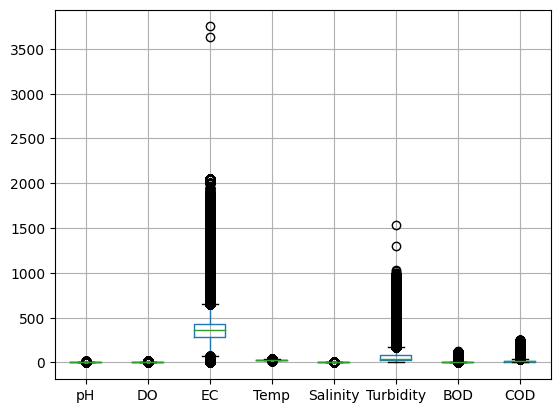

In [472]:
df.boxplot()

จัดการ outlier data


In [473]:
def remove_outliers_iqr(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        dataframe = dataframe[(dataframe[column] >= lower_bound) & (
            dataframe[column] <= upper_bound)]
    return dataframe


In [474]:
# DO	EC	Temp	Salinity	Turbidity	BOD	COD
df_out = df.copy()

df_out = remove_outliers_iqr(df_out, ['pH', 'DO', 'EC', 'Temp',
                                      'Salinity', 'Turbidity', 'BOD', 'COD'])

<Axes: >

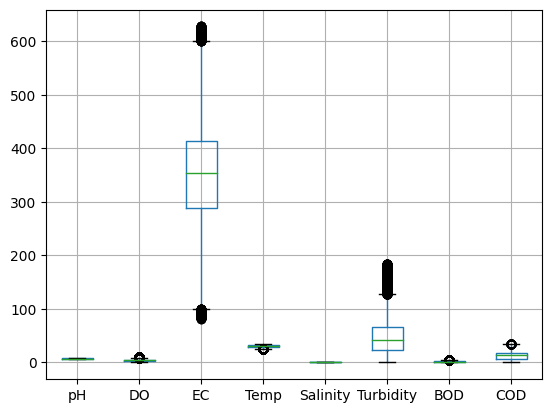

In [475]:
df_out.boxplot()

## Duplicate data


In [476]:
print('จำนวน Duplicate Data df:', df.duplicated().sum())

จำนวน Duplicate Data df: 302


In [477]:
# ลบ Duplicate Data
df = df.drop_duplicates()

# Data Transformation: Normalization


In [478]:
X_columns = ['DO', 'EC', 'Temp',
             'Salinity', 'Turbidity', 'BOD', 'COD']


In [479]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[X_columns])


MinMaxScaler()

In [480]:
df_split_copy = df.copy()


## แบ่งชุดข้อมูล


In [481]:
# seed สุ่มข้อมูล
seed = 5712
# แบ่งชุดข้อมูลออกเป็น test
df_split, df_test = train_test_split(
    df_split_copy, test_size=0.01, random_state=seed)
df_test = df_test[:100]
# บ่งชุดข้อมูลออกเป็น  training
df_train = df_split

In [482]:
# จำนวนชุดข้อมูล
print('จำนวนชุดข้อมูลทั้งหมด :', len(df))
print('จำนวนชุดข้อมูล training :', len(df_train))
print('จำนวนชุดข้อมูล test :', len(df_test))

จำนวนชุดข้อมูลทั้งหมด : 157954
จำนวนชุดข้อมูล training : 156374
จำนวนชุดข้อมูล test : 100


In [483]:
# แยก X,Y
X_train = df_train[X_columns]
Y_train = df_train['pH'].values.ravel()

X_test = df_test[X_columns]
Y_test = df_test['pH'].values.ravel()


## Transform


In [484]:
X_train_transform = scaler.transform(X_train)

X_test_transform = scaler.transform(X_test)


# KNN


In [485]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# สร้างโมเดล KNNC
model = KNeighborsClassifier(n_neighbors=5)

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train_transform,  Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test_transform)

## Evaluating Model KNNC


In [495]:

# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"KNNC Accuracy: {accuracy}")
mean = mean_squared_error(Y_test, Y_pred)
print(f"KNNC MAE: {mean}")

KNNC Accuracy: 0.93
KNNC MAE: 0.07


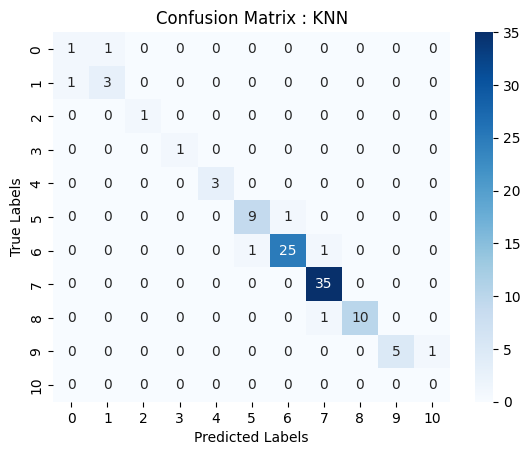

In [496]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix : KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Naive bayes


In [497]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [498]:
# สร้างโมเดล Naive Bayes
model = GaussianNB()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train_transform,  Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด test

Y_pred = model.predict(X_test_transform)

## Evaluating Model Naive bayes


In [499]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Naive Bayes Accuracy: {accuracy}")

mean = mean_squared_error(Y_test, Y_pred)
print(f"Naive Bayes MAE: {mean}")

Naive Bayes Accuracy: 0.39
Naive Bayes MAE: 2.08


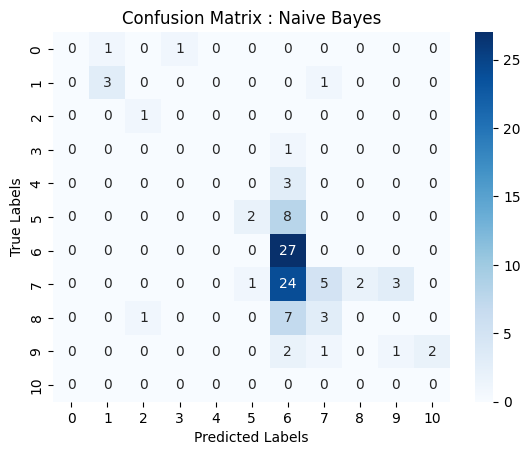

In [500]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix : Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Decision Tree


In [501]:
from sklearn.tree import DecisionTreeClassifier


# สร้างโมเดล Decision Tree
model = DecisionTreeClassifier()

# ฝึกโมเดลด้วยชุด Train
model.fit(X_train_transform, Y_train)

# ใช้โมเดลที่ฝึกแล้วทำนายคลาสของชุด Validation

Y_pred = model.predict(X_test_transform)

## Evaluating Model Decision Tree


In [502]:
# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(Y_test, Y_pred)

# แสดงผลลัพธ์
print(f"Decision Tree Accuracy: {accuracy}")

mean = mean_squared_error(Y_test, Y_pred)
print(f"Decision Tree MAE: {mean}")

Decision Tree Accuracy: 0.95
Decision Tree MAE: 0.05


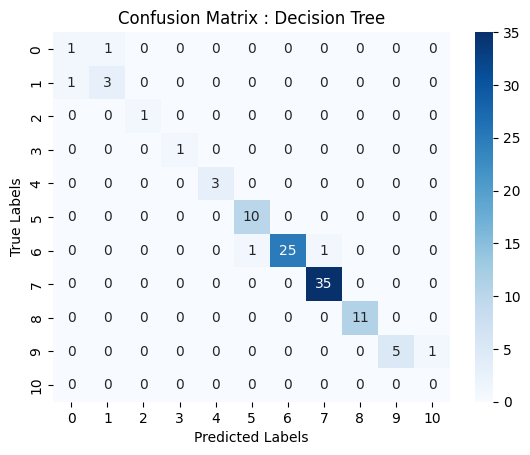

In [503]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)

# แสดงผล Confusion Matrix ด้วย Heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix : Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()